In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas
from bmm import BMM
from lda import LDA

In [23]:
data = sio.loadmat('kos_doc_data.mat')
A = data['A']
B = data['B']
V = []
for arr in data['V']:
    V.append(arr[0][0])
V = np.array(V)

In [24]:
A, B, V

(array([[   1,    2,    1],
        [   1,   15,    1],
        [   1,   28,    1],
        ...,
        [2000, 6689,    1],
        [2000, 6761,    1],
        [2000, 6798,    2]], dtype=uint16),
 array([[2001,   69,    3],
        [2001,   75,    1],
        [2001,   76,    1],
        ...,
        [3430, 6738,    1],
        [3430, 6760,    1],
        [3430, 6767,    1]], dtype=uint16),
 array(['aarp', 'abandon', 'abandoned', ..., 'zogbys', 'zone', 'zones'],
       dtype='<U40'))

In [25]:
A.shape, B.shape, V.shape

((205211, 3), (147949, 3), (6906,))

# Task A -  Maximum Likelihood

In [54]:
def sorted_word(mlm, word_ids,M):
    W = len(mlm)
    xx = np.linspace(0, M, M)
    plt.figure(figsize=(20, 20))
    sorted_indices = np.argsort(mlm,0)
    sorted_names = word_ids[sorted_indices]
    plt.barh(xx, mlm[sorted_indices[-M:]])
    plt.yticks(np.linspace(0, M, M), labels=sorted_names[-M:])
    plt.ylim([-2, M+2])
    plt.xlabel('Word Probability')
    plt.ylabel('Words')
    plt.show()
    #plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    #plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    #plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    #plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    #plt.rc('legend', fontsize='xx-large')
    
    #plt.figure(figsize=(20, 20))
    #plt.plot(mlm[sorted_indices[::-1]],'x')
    #plt.ylabel('Word Probability')
    #plt.xlabel('Order')
    #plt.show()
    #plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    #plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels

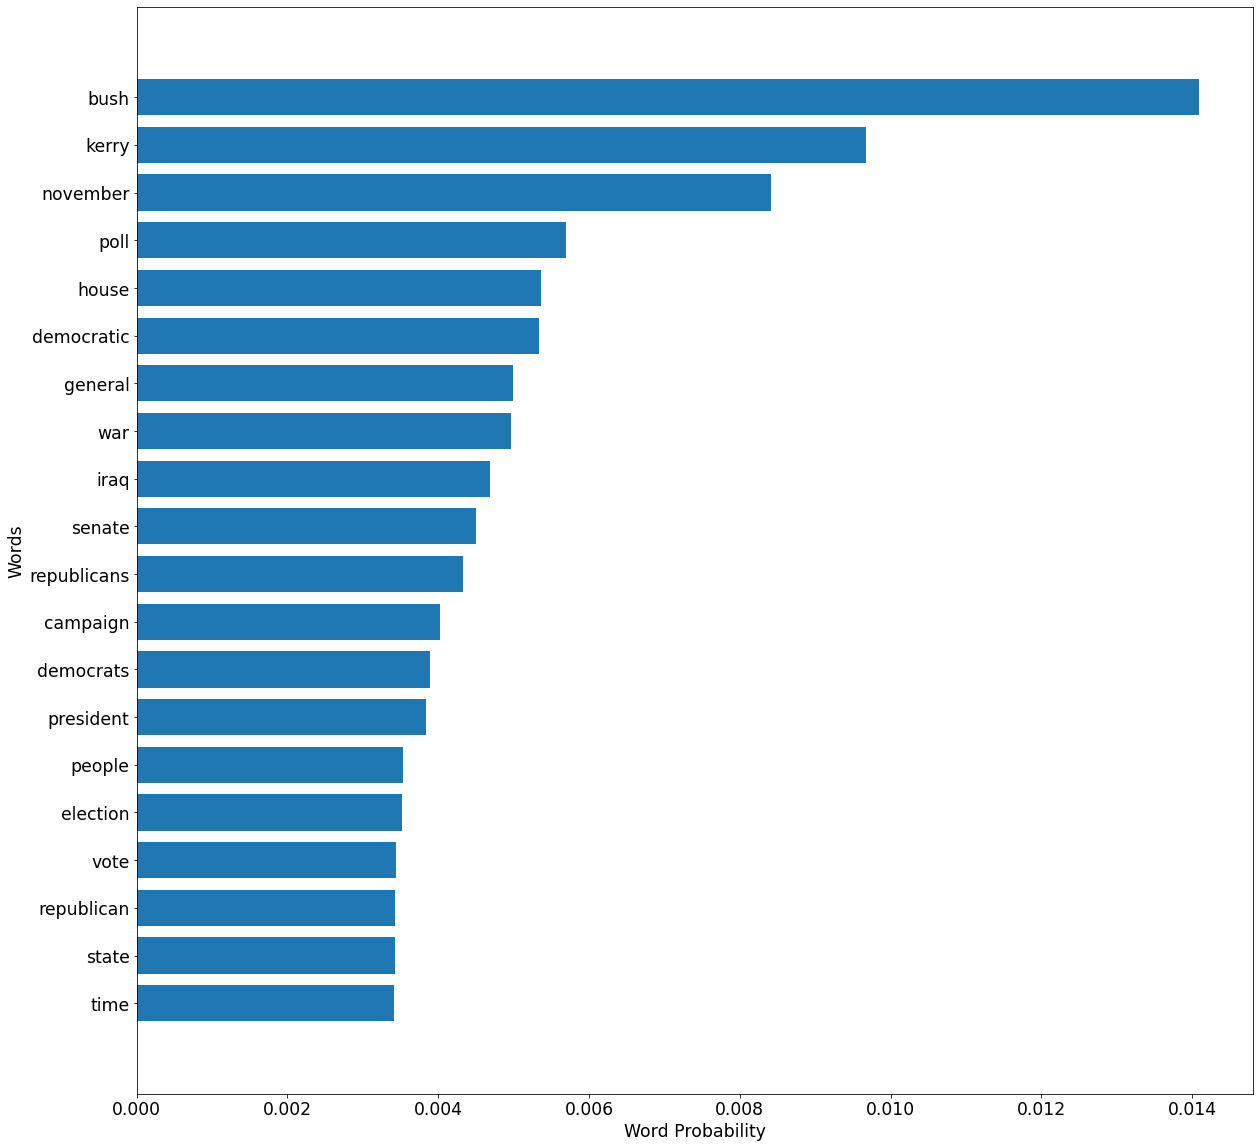

In [68]:
N_1 = A.shape[0] #number training examples
N_2 = B.shape[0] #number test examples
start = np.min([np.min(A[:, 1]), np.min(B[:, 1])])
D = np.max(A[:, 0]) # number of documents
N_w = np.sum(A,0)[2] # total number of words (not unique) in A

mlm = np.zeros(W)
counts=np.zeros(W)
for i in range(N_1):
    counts[A[i,1]-1]+=A[i,2]
mlm = counts/N_w
word_ids = np.linspace(start,W,W,dtype = int)

M=20
sorted_word(mlm,V,M)

# Task B - Bayesian Inference

In [56]:
sorted_indices = np.argsort(mlm,0)
sorted_names = V[sorted_indices]

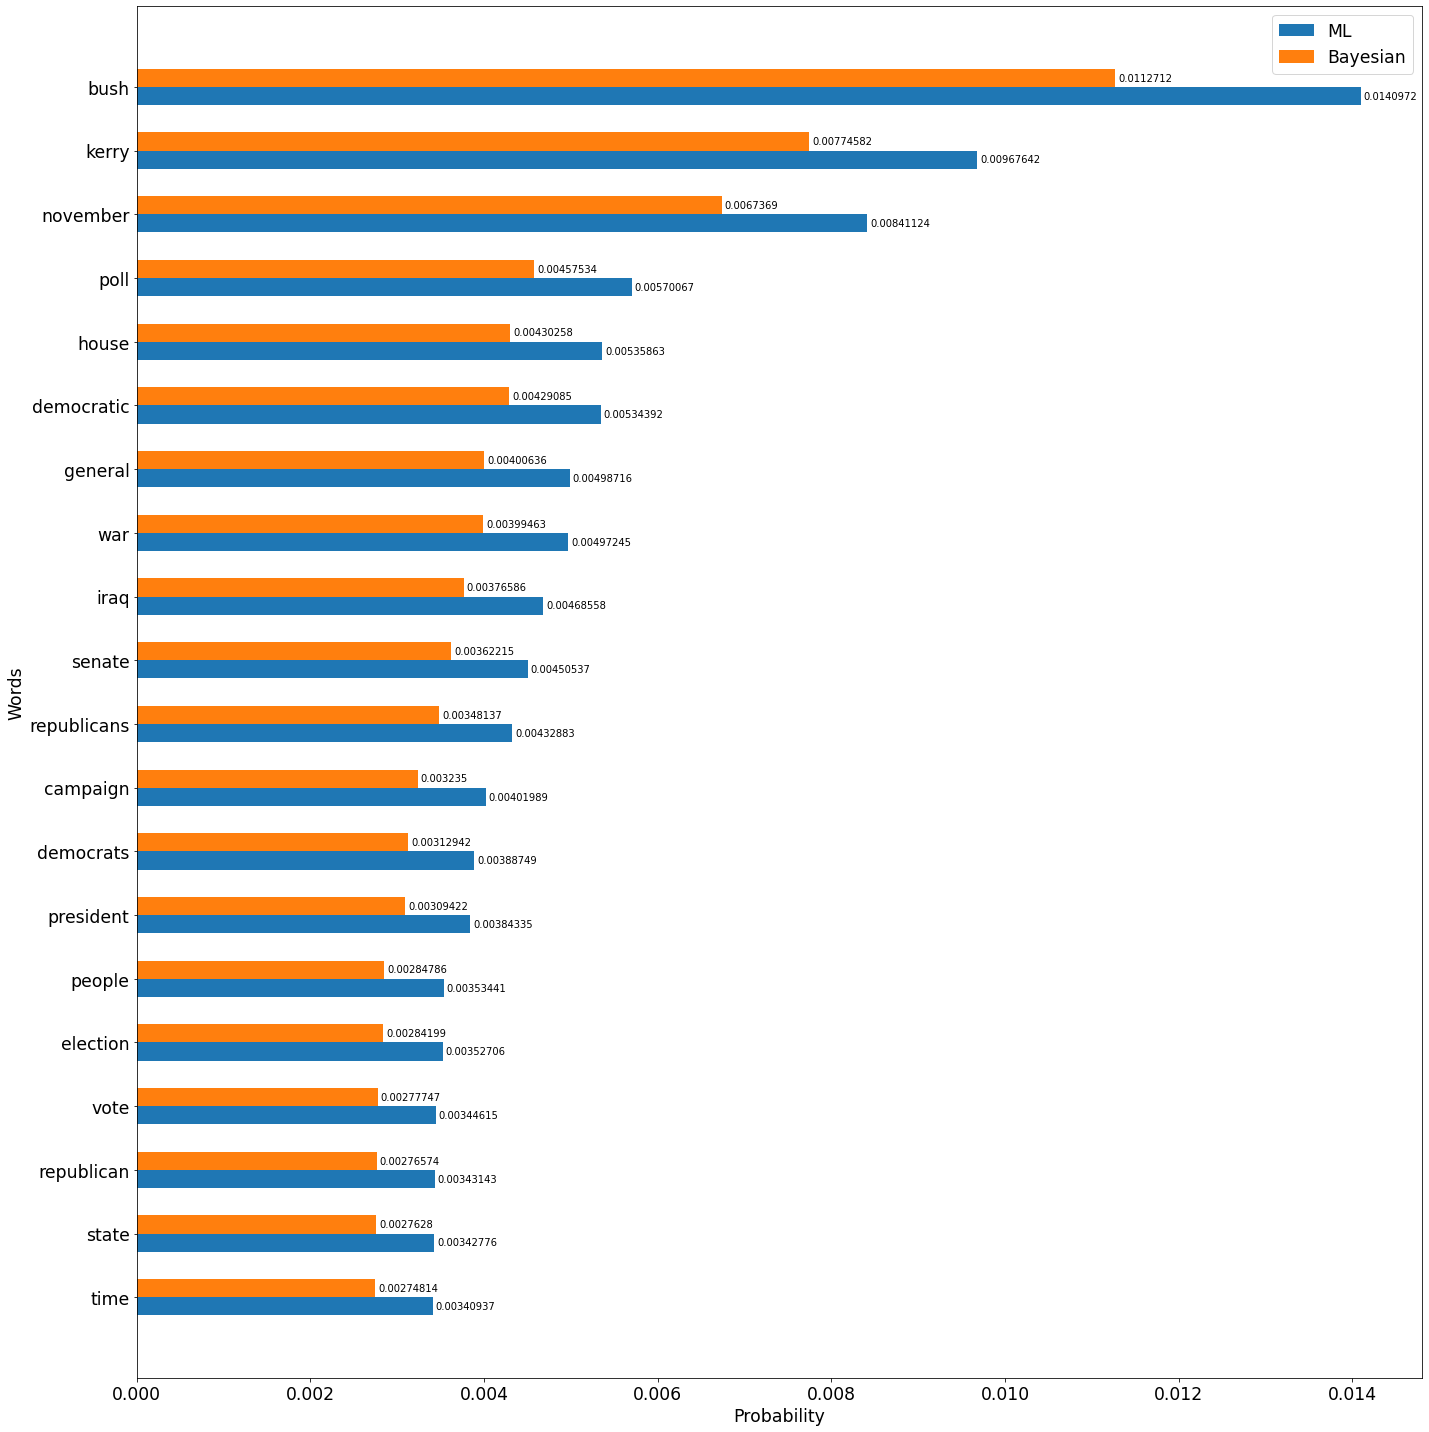

In [92]:
alpha = 10

post_counts = counts + alpha

probs = post_counts / np.sum(post_counts)

M=20

width=0.3
x = np.linspace(0, M, M)
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.barh(x - width/2, mlm[sorted_indices[-M:]], width, label='ML')
rects2 = ax.barh(x + width/2, probs[sorted_indices[-M:]], width, label='Bayesian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Words')
ax.set_xlabel('Probability')
ax.set_yticks(x, labels=sorted_names[-M:])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Task C

In [93]:
doc_id = 2001
doc_indices = np.where(B[:, 0] == doc_id)  # get all occurrences of document d in the training data

doc_word_counts = np.zeros(W)

word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
counts = np.array(B[doc_indices, 2])  # counts of words in document d
doc_word_counts[word_ids-1] += counts  # marry correct ordering

n = np.sum(doc_word_counts).astype(int)

log_post_freqs = np.log(posterior_freqs)
log_prob = np.dot(doc_word_counts, log_post_freqs)

perplexity = np.exp(- log_prob / n)

print("Document {} has log probability: l={}".format(doc_id, log_prob))
print("Total n={} words in doc".format(n))
print("Perplexity p={}".format(perplexity))

Document 2001 has log probability: l=-3691.216789206269
Total n=440 words in doc
Perplexity p=4398.984801609545
